In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [7]:
df = pd.read_csv('house_prices.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
size = df['sqft_living']
price = df['price']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [30]:
len(df.index)

21613

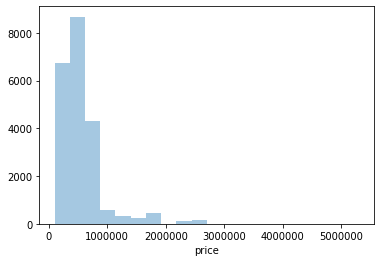

In [19]:
sns.distplot(price[size],kde=False,bins=20)

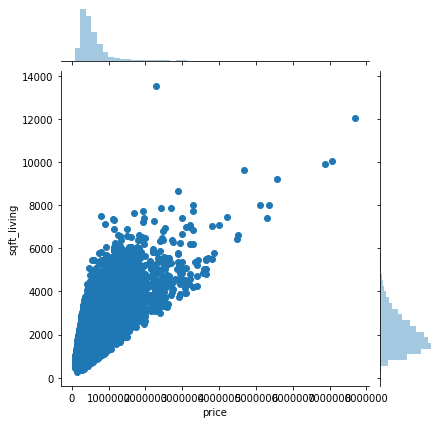

In [23]:
sns.jointplot(x=price,y=size, data= df)

In [25]:
x = np.array(size).reshape(-1,1)
y = np.array(price).reshape(-1,1)

In [26]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
regression_model_mse = mean_squared_error(x,y)
print("MSE:", math.sqrt(regression_model_mse))
print("R squared values :", model.score(x,y))

MSE: 650965.7788663033
R squared values : 0.49285321790379316


In [28]:
print(model.coef_[0])
print(model.intercept_[0])

[280.6235679]
-43580.743094473844


<function matplotlib.pyplot.show(*args, **kw)>

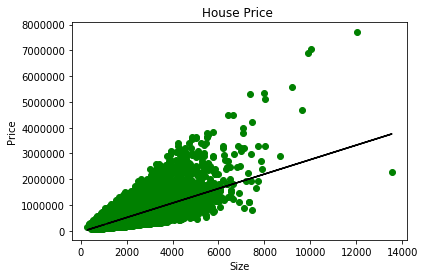

In [29]:
plt.scatter(x,y,color= "green")
plt.plot(x, model.predict(x), color="black")
plt.title("House Price ")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show